# Building Random forest and extremely random forest calssiers



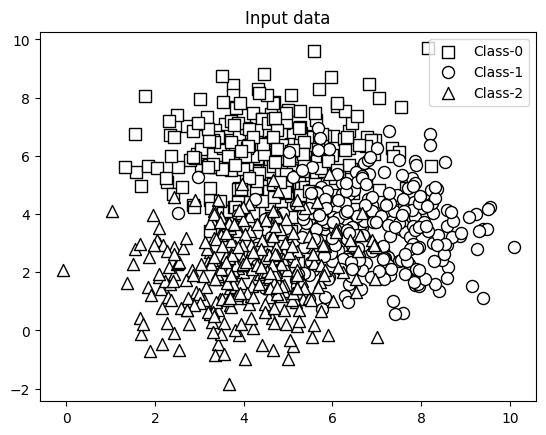

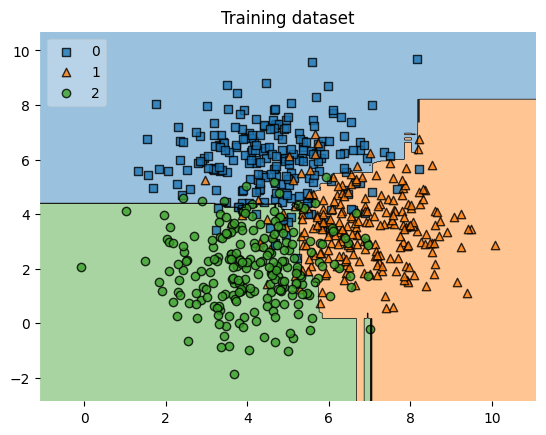

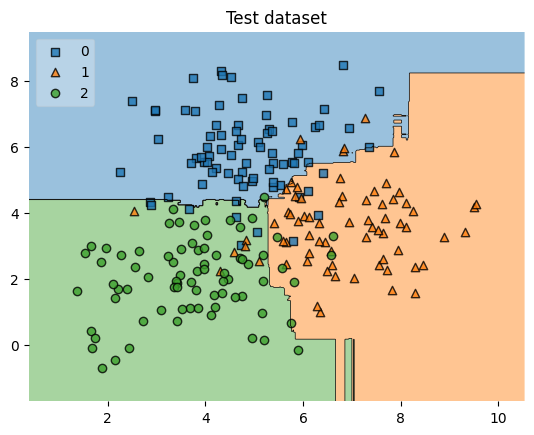


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

###########################

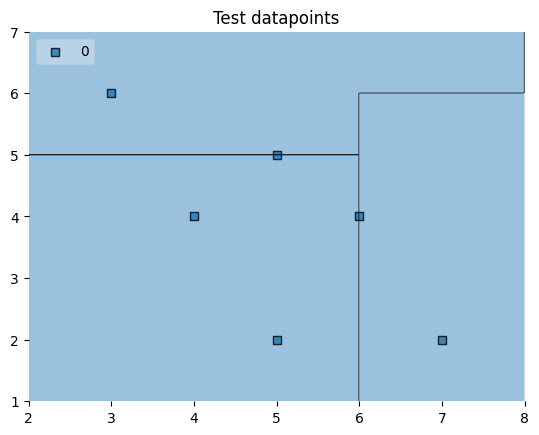

In [ ]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from mlxtend.plotting import plot_decision_regions  # For visualization

# Argument parser to handle command-line arguments
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using Ensemble Learning techniques')
    parser.add_argument('--classifier-type', dest='classifier_type',
            required=True, choices=['rf', 'erf'], help="Type of classifier to use; can be either 'rf' or 'erf'")
    return parser

if __name__=='__main__':
    # Manually set the classifier type, either 'rf' for Random Forest or 'erf' for Extra Trees Classifier.
    classifier_type = 'rf'  # Change this to 'erf' to use ExtraTreesClassifier

    # Load the input data from a CSV file
    input_file = 'data_random_forests.txt'
    data = np.loadtxt(input_file, delimiter=',')  # Read the data from the file
    X, y = data[:, :-1], data[:, -1]  # X is the feature set, y is the target labels

    # Visualize the input data points in 2D for the first two features
    plt.figure()  # Start a new figure
    plt.scatter(X[y == 0, 0], X[y == 0, 1], s=75, facecolors='white',
                edgecolors='black', linewidth=1, marker='s', label='Class-0')  # Class-0 in square markers
    plt.scatter(X[y == 1, 0], X[y == 1, 1], s=75, facecolors='white',
                edgecolors='black', linewidth=1, marker='o', label='Class-1')  # Class-1 in circle markers
    plt.scatter(X[y == 2, 0], X[y == 2, 1], s=75, facecolors='white',
                edgecolors='black', linewidth=1, marker='^', label='Class-2')  # Class-2 in triangle markers
    plt.title('Input data')  # Set the title of the plot
    plt.legend()  # Show legend
    plt.show()  # Display the plot

    # Split the data into training and testing sets (75% training, 25% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

    # Set the parameters for the ensemble classifiers
    params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}

    # Choose the classifier based on the user input
    if classifier_type == 'rf':  # Random Forest Classifier
        classifier = RandomForestClassifier(**params)
    else:  # Extra Trees Classifier
        classifier = ExtraTreesClassifier(**params)

    # Train the selected classifier on the training data
    classifier.fit(X_train, y_train)

    # Visualize decision boundaries for the training dataset
    plot_decision_regions(X_train, y_train.astype(int), clf=classifier, legend=2)
    plt.title('Training dataset')  # Set the title for the training data plot
    plt.show()  # Display the plot

    # Predict the labels for the test data and visualize the decision boundaries
    y_test_pred = classifier.predict(X_test)  # Make predictions on the test data
    plot_decision_regions(X_test, y_test.astype(int), clf=classifier, legend=2)
    plt.title('Test dataset')  # Set the title for the test data plot
    plt.show()  # Display the plot

    # Evaluate classifier performance on the training dataset
    class_names = ['Class-0', 'Class-1', 'Class-2']
    print("\n" + "#" * 40)
    print("\nClassifier performance on training dataset\n")
    print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))  # Print performance metrics
    print("#" * 40 + "\n")

    # Evaluate classifier performance on the test dataset
    print("#" * 40)
    print("\nClassifier performance on test dataset\n")
    print(classification_report(y_test, y_test_pred, target_names=class_names))  # Print performance metrics for test data
    print("#" * 40 + "\n")

    # Confidence measurement for custom test data points
    test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])  # Example data points

    print("\nConfidence measure:")
    for datapoint in test_datapoints:
        probabilities = classifier.predict_proba([datapoint])[0]  # Get the predicted probabilities
        predicted_class = 'Class-' + str(np.argmax(probabilities))  # Find the class with the highest probability
        print('\nDatapoint:', datapoint)
        print('Predicted class:', predicted_class)  # Print the predicted class for each test point

    # Visualize decision boundaries for the custom test data points (use integer type for labels)
    plot_decision_regions(test_datapoints, np.zeros(len(test_datapoints), dtype=int), clf=classifier, legend=2)
    plt.title('Test datapoints')  # Set the title for the test datapoints plot
    plt.show()  # Display the plot


# Ensemble Learning Classification: Comprehensive Line-by-Line Analysis

## Import Statements
```python
import argparse  # Command-line argument parsing
import numpy as np  # Numerical computing
import matplotlib.pyplot as plt  # Data visualization
from sklearn.metrics import classification_report  # Performance evaluation
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier  # Ensemble classifiers
from mlxtend.plotting import plot_decision_regions  # Decision boundary visualization
```
### Purpose
- Set up necessary libraries for machine learning workflow
- Include tools for data manipulation, visualization, and classification

## Argument Parser Function
```python
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using Ensemble Learning techniques')
    parser.add_argument('--classifier-type', dest='classifier_type',
            required=True, choices=['rf', 'erf'], help="Type of classifier to use; can be either 'rf' or 'erf'")
    return parser
```
### Key Characteristics
- Allows command-line selection of classifier type
- Supports two classification algorithms
- Ensures user provides a valid classifier choice

## Main Execution Block
### Data Loading
```python
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]
```
#### Functionality
- Reads data from CSV/text file
- Separates features (X) from target labels (y)
- Uses last column as label, preceding columns as features

### Data Visualization
```python
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='s', label='Class-0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label='Class-1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], marker='^', label='Class-2')
```
#### Visualization Strategy
- Different markers for each class
- Shows data distribution
- Helps understand initial data structure

### Data Splitting
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
```
#### Splitting Parameters
- 75% training, 25% testing
- Ensures reproducible splits
- Allows model performance evaluation

### Classifier Configuration
```python
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
```
#### Hyperparameter Choices
- 100 trees in ensemble
- Maximum tree depth of 4
- Ensures reproducibility

### Classifier Selection
```python
if classifier_type == 'rf':
    classifier = RandomForestClassifier(**params)
else:
    classifier = ExtraTreesClassifier(**params)
```
#### Algorithm Differences
- Random Forest: Bootstrap aggregating with random feature selection
- Extra Trees: Similar to Random Forest but with additional randomization

### Model Training
```python
classifier.fit(X_train, y_train)
```
- Trains selected ensemble model
- Learns decision boundaries
- Creates ensemble of decision trees

### Decision Boundary Visualization
```python
plot_decision_regions(X_train, y_train.astype(int), clf=classifier)
```
- Shows how classifier separates classes
- Illustrates learned decision boundaries
- Provides intuitive model understanding

### Performance Evaluation
```python
print(classification_report(y_test, y_test_pred, target_names=class_names))
```
#### Metrics Explained
- Precision: Correctness of positive predictions
- Recall: Completeness of positive predictions
- F1-score: Balanced measure of precision and recall
- Support: Number of instances for each class

### Confidence Measurement
```python
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-' + str(np.argmax(probabilities))
```
#### Functionality
- Predicts class probabilities
- Identifies most likely class
- Provides confidence insights

## Key Machine Learning Principles
- Ensemble methods reduce overfitting
- Multiple trees provide robust classification
- Handles complex, non-linear decision boundaries